# Escalado
Conjunto de datos: iris (incluido en sklearn)
Este conjunto de datos es compacto y perfecto para demostrar técnicas de escalado.

In [1]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
iris = load_iris(as_frame=True)
data = iris.data

In [3]:
# Visualizar las estadísticas iniciales
print("Estadísticas iniciales:")
data.describe()

Estadísticas iniciales:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [5]:
# Aplicar StandardScaler
standard_scaler = StandardScaler()
data_standard = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre las estadísticas originales y las del escalado MinMax?


In [ ]:

# Cargar datos
iris = load_iris(as_frame=True)
data = iris.data

# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

# Comparar estadísticas
original_stats = data.describe().T[['mean','std','min','max']]
minmax_stats = data_minmax.describe().T[['mean','std','min','max']]

comparison = pd.concat([original_stats, minmax_stats], axis=1)
comparison.columns = ['mean_original','std_original','min_original','max_original',
                      'mean_minmax','std_minmax','min_minmax','max_minmax']

print(comparison)


# Rango de valores:

  #Original: varía según la columna (min y max diferentes).

  #MinMax: todos los valores están normalizados entre 0 y 1 (min=0, max=1).

#Media y desviación estándar:

  #Original: la media y desviación reflejan la escala original de la característica.

  #MinMax: la media y desviación ya no reflejan la magnitud original, dependen del rango relativo de cada columna.

#Forma de la distribución:

  #MinMax no altera la forma, solo escala linealmente todos los valores al rango [0,1].

#MinMaxScaler cambia la escala y el rango, pero conserva la forma de los datos, mientras que la media y desviación pierden su valor interpretativo original.


                   mean_original  std_original  min_original  max_original  \
sepal length (cm)       5.843333      0.828066           4.3           7.9   
sepal width (cm)        3.057333      0.435866           2.0           4.4   
petal length (cm)       3.758000      1.765298           1.0           6.9   
petal width (cm)        1.199333      0.762238           0.1           2.5   

                   mean_minmax  std_minmax  min_minmax  max_minmax  
sepal length (cm)     0.428704    0.230018         0.0         1.0  
sepal width (cm)      0.440556    0.181611         0.0         1.0  
petal length (cm)     0.467458    0.299203         0.0         1.0  
petal width (cm)      0.458056    0.317599         0.0         1.0  


### 2. Crea una gráfica de la distribución de la variable 'sepal length (cm)' antes y después del escalado.

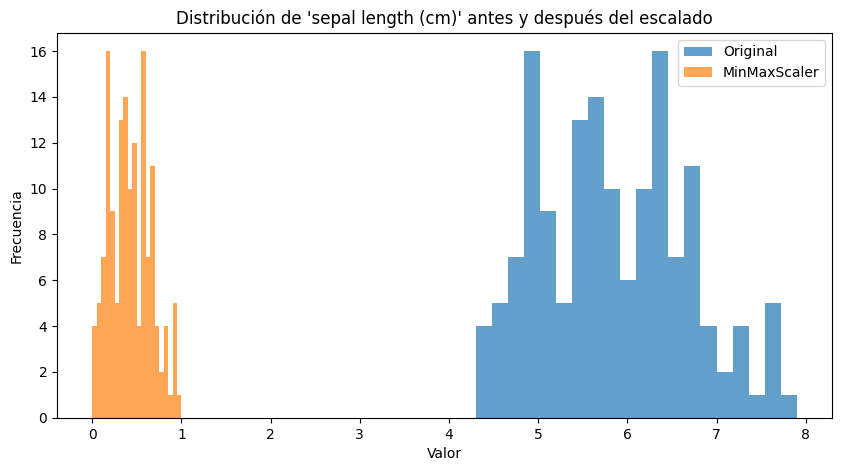

In [10]:



# Graficar histogramas
plt.figure(figsize=(10, 5))

plt.hist(data['sepal length (cm)'], bins=20, alpha=0.7, label='Original')
plt.hist(data_minmax['sepal length (cm)'], bins=20, alpha=0.7, label='MinMaxScaler')

plt.title("Distribución de 'sepal length (cm)' antes y después del escalado")
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


### 3. Crea una gráfica de dispersión entre 'sepal length (cm)' y 'sepal width (cm)' con los datos escalados por StandardScaler.

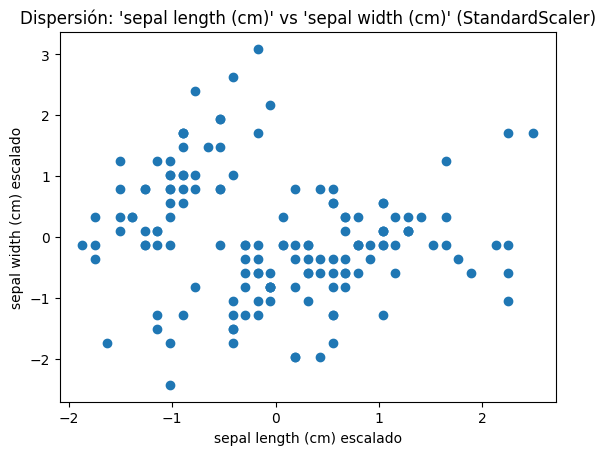

In [11]:


# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Escalado con StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=iris.feature_names)

# Crear gráfico de dispersión
plt.figure()
plt.scatter(scaled_df['sepal length (cm)'], scaled_df['sepal width (cm)'])
plt.title("Dispersión: 'sepal length (cm)' vs 'sepal width (cm)' (StandardScaler)")
plt.xlabel("sepal length (cm) escalado")
plt.ylabel("sepal width (cm) escalado")
plt.show()


### 4. ¿Qué técnica de escalado crees que es más adecuada para este conjunto de datos? ¿Por qué?

In [16]:
#La técnica de escalado más adecuada para el conjunto de datos Iris es StandardScaler

#Las variables del Iris (longitudes y anchos del sépalo y pétalo) siguen aproximadamente una distribución normal, lo cual es ideal para StandardScaler

#Muchos algoritmos de Machine Learning (como PCA, Regresión Logística, SVM, K-Means) funcionan mejor cuando los datos están centrados en
#0 y tienen varianza uniforme, lo cual brinda StandardScaler.

#Aunque MinMaxScaler también funciona bien, puede distorsionar distancias y varianzas, especialmente si luego usamos algoritmos basados en distancias.
#StandardScaler es la técnica más adecuada para el dataset Iris, ya que estandariza los datos manteniendo su estructura estadística, facilita el análisis 
#y es ideal para algoritmos que asumen distribución normal o dependen de las distancias.


